# pistachio


In [1]:
# convert arff to parquet

from scipy.io import arff 
import pandas as pd
import os

arff_filepath = './data/Pistachio_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.arff'
parquet_path = './data/pistachio_16.snappy.pqt'

def arff_to_parquet(input_arff: str, output_parquet: str):
    """convert arff file to parquet"""
    if not os.path.exists(input_arff):
        raise ValueError(f"input file '{input_arff}' does not exist")
    data, meta = arff.loadarff(input_arff)
    print("arff metadata")
    print(meta)
    df = pd.DataFrame(data)
    df['Class'] = df['Class'].astype(str)
    df.to_parquet(output_parquet)
##################

if not os.path.exists(parquet_path):
    print("converting arff to parquet")
    arff_to_parquet(arff_filepath, parquet_path)


In [2]:
# Dataset: Pistachio_16_Features_Dataset
# 	AREA's type is numeric
# 	PERIMETER's type is numeric
# 	MAJOR_AXIS's type is numeric
# 	MINOR_AXIS's type is numeric
# 	ECCENTRICITY's type is numeric
# 	EQDIASQ's type is numeric
# 	SOLIDITY's type is numeric
# 	CONVEX_AREA's type is numeric
# 	EXTENT's type is numeric
# 	ASPECT_RATIO's type is numeric
# 	ROUNDNESS's type is numeric
# 	COMPACTNESS's type is numeric
# 	SHAPEFACTOR_1's type is numeric
# 	SHAPEFACTOR_2's type is numeric
# 	SHAPEFACTOR_3's type is numeric
# 	SHAPEFACTOR_4's type is numeric
# 	Class's type is nominal, range is ('Kirmizi_Pistachio', 'Siit_Pistachio')

## Load Data
load data from parquet, stratify split to train and test

In [3]:
from typing import List
import numpy as np
from sklearn.model_selection import train_test_split

def split_data(
        input_parquet: str, 
        train_filename: str,
        test_filename: str,
        label_column: str,
        test_fraction: float=0.2,
        seed: int=42):
    """stratify sample the data"""
    # set seed
    # np.random.seed(seed)
    in_df = pd.read_parquet(input_parquet)
    y = in_df.pop(label_column)
    x_train, x_test, y_train, y_test = train_test_split(
        in_df, 
        y, 
        random_state=seed, 
        stratify=y, 
        test_size=test_fraction)
    # reattach labels
    x_train[label_column] = y_train
    x_test[label_column] = y_test
    print(f'x_train shape = {x_train.shape}')
    print(f'y_train shape = {y_train.shape}')
    print(f'x_test shape = {x_test.shape}')
    print(f'y_test shape = {y_test.shape}')
    # write data
    x_train.to_parquet(train_filename)
    x_test.to_parquet(test_filename)
##############################

train_path = './data/pistachio_train.pqt'
test_path = './data/pistachio_test.pqt'
split_seed = 41
label_column = 'Class'
test_fraction = 0.2
input_data_schema_path = "./data/pistachio_schema.json"

if not (os.path.exists(train_path) and os.path.exists(test_path)):
    split_data(
        parquet_path,
        train_path,
        test_path,
        label_column=label_column,
        test_fraction=test_fraction,
        seed=split_seed)
    print('split train and test data')


## Validate Data

In [4]:
#! pip install pandera[io]

In [5]:
# very quick EDA/summary on the train data
train = pd.read_parquet(train_path)
summary = train.describe(include='all')
summary

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kirmizi_Pistachio
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,985
mean,79990.176368,1423.800903,446.184575,238.404956,0.840033,318.003064,0.940279,85048.962165,0.715327,1.897053,0.571019,0.713397,0.005698,0.003016,0.510931,0.955492,NaN
std,13075.738130,375.345641,32.531725,30.372990,0.048895,26.853806,0.050205,13180.036678,0.053204,0.239194,0.212615,0.044681,0.000825,0.000333,0.064074,0.050951,NaN
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400,NaN
25%,71859.500000,1169.588750,426.337050,217.925450,0.817225,302.480300,0.920025,76334.000000,0.685225,1.735225,0.375375,0.682225,0.005200,0.002800,0.465425,0.944000,NaN
50%,79997.500000,1261.599000,448.897750,236.299450,0.849200,319.148850,0.954500,85097.000000,0.725800,1.893500,0.644100,0.710850,0.005600,0.003000,0.505350,0.973300,NaN
75%,89018.000000,1603.212000,468.631300,257.292375,0.875100,336.661875,0.976775,93919.000000,0.753575,2.066650,0.744500,0.742300,0.006100,0.003200,0.551000,0.987200,NaN


In [6]:

import pandera as pa
# schema = pa.infer_schema(train)
# print(schema)
from pandera import Check, Column, DataFrameSchema
# define schema based on inspecting the training data above
if not os.path.exists(input_data_schema_path):
# if True:
    print("creating schema")
    schema = DataFrameSchema(
        columns={
            "AREA": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=100.0),
                    Check.less_than_or_equal_to(max_value=1e6)
                ],
                nullable=False
            ),
            "PERIMETER": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=100.0),
                    Check.less_than_or_equal_to(max_value=1e6)
                ],
                nullable=False
            ),
            "MAJOR_AXIS": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=10.0),
                    Check.less_than_or_equal_to(max_value=1e6)
                ],
                nullable=False
            ),
            "MINOR_AXIS": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=10.0),
                    Check.less_than_or_equal_to(max_value=1e6)
                ],
                nullable=False
            ),
            "ECCENTRICITY": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "EQDIASQ": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=100.0),
                    Check.less_than_or_equal_to(max_value=1e6)
                ],
                nullable=False
            ),
            "SOLIDITY": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "CONVEX_AREA": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=1000.0),
                    Check.less_than_or_equal_to(max_value=1e6)
                ],
                nullable=False
            ),
            "EXTENT": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "ASPECT_RATIO": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=100.0)
                ],
                nullable=False
            ),
            "ROUNDNESS": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "COMPACTNESS": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "SHAPEFACTOR_1": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "SHAPEFACTOR_2": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "SHAPEFACTOR_3": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "SHAPEFACTOR_4": Column(
                dtype="float64",
                checks=[
                    Check.greater_than_or_equal_to(min_value=0.0),
                    Check.less_than_or_equal_to(max_value=1.0)
                ],
                nullable=False
            ),
            "Class": Column(
                dtype="object",
                checks=[
                    Check.isin(['Siit_Pistachio', 'Kirmizi_Pistachio'])
                ],
                nullable=False
            )
        }
    )
    print(schema)
    schema.to_json(input_data_schema_path)
    print(f"wrote schema to {input_data_schema_path}")


In [7]:

# Validate Data (dtypes, count nulls)
# preprocess - feature engineering, cast class to 1/0
# tune - hyperopt or bayes_opt
# stash metadata/experiment results
# train with best parameters
# evaluate
# run inference on dummy "new" data
from pandera import DataFrameSchema
def validate_data(in_df: pd.DataFrame, schema_file: str) -> pd.DataFrame:
    """check input data, count nulls, basic stats"""
    # load schema
    the_schema = DataFrameSchema.from_json(schema_file)
    the_schema.validate(in_df)

    
    
    # summary = in_df.describe(include='all')
    # # check for entirely missing columns
    # entirely_missing = [x for x in in_df.columns if summary.loc['count', x] == 0]
    # if entirely_missing:
    #     raise ValueError(f'following columns in supplied data are missing: {entirely_missing}')
    # # check that columns have more than one unique value
    # single_value_columns = [x for x in in_df.columns if summary.loc['unique', column] == 1]
    # if entirely_missing:
    #     raise ValueError(f'following columns in supplied data are missing: {entirely_missing}')

validate_data(train, input_data_schema_path)

print("no errors, data looks good")



# train['Class'] = train.Class.astype('category')
# train.Class.cat.codes

# https://pandas.pydata.org/docs/user_guide/categorical.html#controlling-behavior


no errors, data looks good


In [8]:
from pandas.api.types import CategoricalDtype
def preprocess(in_raw_df: pd.DataFrame) -> pd.DataFrame:
    """preprocess the data, do any cleaning, feature engineering, etc"""
    out_df = in_raw_df.copy()

    #cross some features
    out_df['SOLIDITY_MAJOR'] = out_df.SOLIDITY*out_df.MAJOR_AXIS

    # reorder
    cols = [x for x in out_df.columns if x != 'Class']
    out_df = out_df[cols + ['Class']]

    # convert Class to categorical
    class_type = CategoricalDtype(categories=['Siit_Pistachio', 'Kirmizi_Pistachio'])
    out_df.Class = out_df.Class.astype(class_type)
    # create a binary column
    out_df['Target'] = out_df.Class.cat.codes

    return out_df

train_proc = preprocess(train)
train_proc.head()


    
    

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,SOLIDITY_MAJOR,Class,Target
1903,101005.0,1382.8000,476.3697,279.0725,0.8104,358.6134,0.9478,106565.0,0.7732,1.7070,0.6638,0.7528,0.0047,0.0028,0.5667,0.9674,451.503202,Siit_Pistachio,0
1168,96240.0,1427.5699,476.6801,264.1641,0.8324,350.0522,0.9703,99186.0,0.7946,1.8045,0.5934,0.7344,0.0050,0.0027,0.5393,0.9731,462.522701,Kirmizi_Pistachio,1
716,48509.0,1020.7170,439.9729,143.3477,0.9454,248.5228,0.9792,49537.0,0.7156,3.0693,0.5851,0.5649,0.0091,0.0030,0.3191,0.9793,430.821464,Kirmizi_Pistachio,1
1570,100634.0,1260.0811,481.9576,266.3690,0.8334,357.9542,0.9925,101396.0,0.7059,1.8094,0.7964,0.7427,0.0048,0.0026,0.5516,0.9981,478.342918,Siit_Pistachio,0
889,81407.0,1244.4410,497.2620,220.6327,0.8962,321.9482,0.9254,87965.0,0.5527,2.2538,0.6606,0.6474,0.0061,0.0027,0.4192,0.9447,460.166255,Kirmizi_Pistachio,1


## cross validation/tuning

In [9]:
import sklearn
from sklearn.model_selection import StratifiedKFold, cross_validate
from typing import Dict

def cross_validate_estimator(train_X: pd.DataFrame, train_Y: pd.DataFrame, clf: sklearn.base.BaseEstimator, metrics: Dict, n_folds: int=5, cv_seed:int=23, n_jobs: int=2):
    """for a given set of model parameters, use cross validation to evaluate model performance"""
    
    # generate cv_folds
    cv_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=cv_seed)

    results = cross_validate(clf, train_X, train_Y, cv=cv_folds, scoring=metrics, n_jobs=n_jobs)

    return results
    


In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, make_scorer

params = {
    'learning_rate': 0.1,
    'booster': 'gbtree',
    'n_jobs': 1,
    'gamma': 0.01,
    'min_child_weight': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.3,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1
}

cv_seed = 37
metrics = {
    "roc_auc": make_scorer(roc_auc_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1_score": make_scorer(f1_score)
}

cols = train_proc.columns
features = [x for x in cols if x not in ['Class','Target']]
train_x = train_proc[features]
train_y = train_proc.Target.values

clf = XGBClassifier(objective='binary:logistic', eval_metric='auc', **params)

results = cross_validate_estimator(train_x, train_y, clf, metrics, cv_seed=cv_seed, n_jobs=2)
agged_results = {k:(np.mean(v), np.std(v)) for k,v in results.items()}

agged_results


{'fit_time': (0.13278775215148925, 0.006645570745767291),
 'score_time': (0.007050466537475586, 0.0008560856767590865),
 'test_roc_auc': (0.8691124721914356, 0.010111355494033258),
 'test_precision': (0.8864885217567421, 0.011389116123450178),
 'test_recall': (0.8923857868020304, 0.031684236617923335),
 'test_f1_score': (0.8889775847285855, 0.013208642189853053)}

In [11]:
from bayes_opt import BayesianOptimization
from bayes_opt.util import Colours

fixed_parameters = {
    "booster": "gbtree",
    "n_jobs": 1,
    'colsample_bytree': 0.3
}
pbounds = {
    'learning_rate': (0.01, 0.3),
    'gamma': (0.0, 0.3),
    'min_child_weight': (0.01, 0.07),
    'max_depth': (3, 5),
    'subsample': (0.7, 0.9),
    'reg_alpha': (0.01, 0.1),
    'reg_lambda': (0.01, 0.1)
}
integer_parameters = ['max_depth']

def cast_integer_params(params: Dict, integer_params: List[str]):
    """cast floats in param values to integers"""
    for x in integer_parameters:
            if x in params:
                params[x] = int(params[x])
    return params
    

def optimise_tune(
    train_x: pd.DataFrame,
    train_y: pd.DataFrame,
    pbounds: Dict, 
    fixed_parameters: Dict,
    integer_parameters: List[str],
    metrics: Dict, 
    cv_seed: int, 
    n_folds: int=5,
    opt_n_init: int=10,
    opt_n_iter: int=20,
    opt_random_seed: int=42
):
    """use Bayesian optimisation to search for optimal model hyperparameters"""

    # initialise list to hold (detailed) experiment results
    trials = []
    # discrete parameters need to be handled specially in bayesopt (explicitly cast to int)
    

    # function to run a trial - evaluate a given set of searchable parameters
    def run_trial(**probe_params):
        params = {**probe_params, **fixed_parameters}
        params = cast_integer_params(params, integer_parameters)
        

        # set up the XGBclassifier
        clf = XGBClassifier(objective='binary:logistic', eval_metric='auc', **params)

        # train/evaluate model through cross validation
        results = cross_validate_estimator(train_x, train_y, clf, metrics, cv_seed=cv_seed, n_jobs=2)

        # aggregate metrics over cv folds - gather mean and std deviation of each metric
        agged_results = {k:(np.mean(v), np.std(v)) for k,v in results.items()}

        # take the final score - the objective to be used for bayes_opt, as the lower bound of mean roc_auc (mean roc_auc minus error in mean roc_auc)
        # This penalises cases where the mean might be high, but where there is more variation across folds (more uncertainty in how the model may generalise).
        final_score = agged_results['test_roc_auc'][0] - agged_results['test_roc_auc'][1]/np.sqrt(n_folds)

        # append all the metrics to the trial result.
        trials.append( {"final_score": final_score, 'params': params, "results": agged_results})
        return final_score

    optimizer = BayesianOptimization(
        f = run_trial,
        random_state=opt_random_seed,
        pbounds=pbounds,
        verbose=2)

    optimizer.maximize(init_points=10,n_iter=40)

    print(f"best_result: {optimizer.max}")
    return optimizer.max, trials

# run the optimisation
best_trial, cv_experiments = optimise_tune(train_x, train_y, pbounds, fixed_parameters, integer_parameters, metrics, cv_seed, n_folds=5)

    
        

    



|   iter    |  target   |   gamma   | learni... | max_depth | min_ch... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | 0.8613    | 0.1124    | 0.2857    | 4.464     | 0.04592   | 0.02404   | 0.02404   | 0.7116    |
| 2         | 0.8707    | 0.2599    | 0.1843    | 4.416     | 0.01124   | 0.09729   | 0.08492   | 0.7425    |
| 3         | 0.8703    | 0.05455   | 0.06319   | 3.608     | 0.04149   | 0.04888   | 0.03621   | 0.8224    |
| 4         | 0.8731    | 0.04185   | 0.09472   | 3.733     | 0.03736   | 0.08067   | 0.02797   | 0.8028    |
| 5         | 0.8653    | 0.1777    | 0.02347   | 4.215     | 0.02023   | 0.01585   | 0.0954    | 0.8931    |
| 6         | 0.8677    | 0.2425    | 0.09834   | 3.195     | 0.05105   | 0.04961   | 0.02098   | 0.799     |
| 7         | 0.8624    | 0.01032   | 0.2737    | 3.518     | 0.04975   | 0.03805   | 0.05681   | 0.8093    |
| 8       

## Train final model

In [12]:
from xgboost import XGBClassifier

final_parameters = {**(best_trial['params']),**fixed_parameters}
final_parameters = cast_integer_params(final_parameters, integer_parameters)

def train_model(
    train_x: pd.DataFrame,
    train_y: pd.DataFrame,
    params: Dict
): 
    """Train a model on entire train set"""
    clf = XGBClassifier(objective='binary:logistic', eval_metric='auc', **params)

    model = clf.fit(train_x, train_y)
    return model
    
model = train_model(train_x, train_y, final_parameters)



In [13]:
model.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': 'gbtree',
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.3,
 'eval_metric': 'auc',
 'gamma': 0.013486306220427203,
 'gpu_id': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.05456513134009019,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 3,
 'max_leaves': None,
 'min_child_weight': 0.04821252064927356,
 'monotone_constraints': None,
 'n_jobs': 1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': 0.02118815334022752,
 'reg_lambda': 0.03214980200991906,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.7115962436536546,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

## Model Evaluation

In [14]:
# feature importance
# precision recall plot
# roc curve
# probability calibration
# confusion matrix


In [15]:
train_predicted_probs = model.predict_proba(train_x)[:,1]
# train_predicted_probs[0:5]
train_predicted_classes = model.predict(train_x)
train_predicted_classes[0:5]
train_predicted_labels = np.array([train_proc.Class.cat.categories[x] for x in train_predicted_classes])
train_positive_responses = np.sum(train_y)
train_positive_response_rate = np.sum(train_y)/len(train_y)


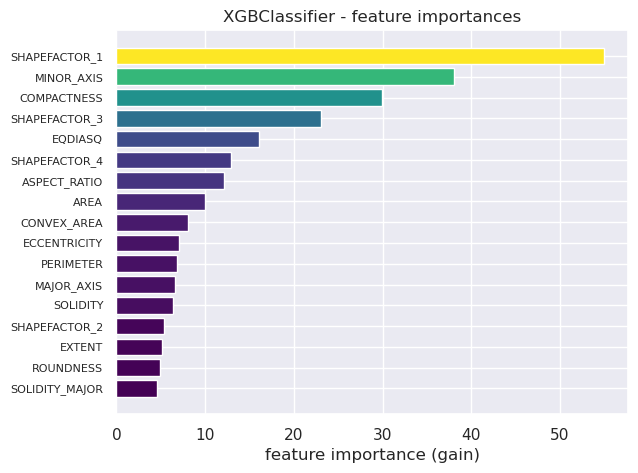

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# from sklearn.metrics import roc_curve
sns.set()

def plot_feature_importances(model: XGBClassifier, title: str = 'feature importances'):
    feature_importances = [(k,v) for k,v in model.get_booster().get_score(importance_type='gain').items()]
    feature_importances.sort(key = lambda x: x[1], reverse=True)
    feats, importances = zip(*feature_importances)
    cmap  = sns.color_palette("viridis", as_cmap=True)
    norm = mpl.colors.Normalize(vmin=importances[-1], vmax=importances[0])
    colours = [cmap(norm(x)) for x in importances]

    fig = plt.figure()
    ax = fig.add_axes([0.2,0.1,0.8,0.8])
    ypos = np.arange(len(importances),0,-1)
    # sns.xkcd_rgb['blurple']
    ax.barh(ypos, importances, color=colours)
    ax.set_yticks(ypos)
    ax.set_yticklabels(feats, fontsize=8)
    ax.set_title(title)
    ax.set_xlabel('feature importance (gain)')
    return fig, ax
    
    
    return feats,imp
fig, ax = plot_feature_importances(model, title='XGBClassifier - feature importances')
fig.savefig('./figures/model_feature_importances.png')

In [17]:
def evaluation_metrics(predicted_probs, predicted_classes, actual_classes, prefix=None):
    """evaluate results"""
    results = {}
    prefix = '' if prefix is None else prefix
    results[f"{prefix}roc_auc_score"] = roc_auc_score(actual_classes, predicted_probs)
    results[f"{prefix}precision_score"] = precision_score(actual_classes, predicted_classes)
    results[f"{prefix}recall_score"] = recall_score(actual_classes, predicted_classes)
    results[f"{prefix}f1_score"] = f1_score(actual_classes, predicted_classes)
    results[f"{prefix}accuracy_score"] = accuracy_score(actual_classes, predicted_classes)
    return results

evaluation_metrics(train_predicted_probs, train_predicted_classes, train_y)
    

{'roc_auc_score': 0.970653942839731,
 'precision_score': 0.9148073022312373,
 'recall_score': 0.915736040609137,
 'f1_score': 0.9152714358193811,
 'accuracy_score': 0.9027939464493597}

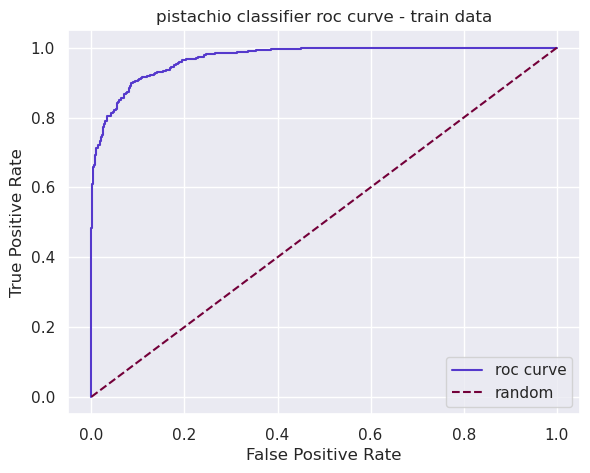

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
sns.set()

def make_roc_plot(predicted_probs, actual_classes, title: str="ROC curve", xlabel='False Positive Rate',ylabel: str='True Positive Rate'):
    """make a roc curve"""
    fpr, tpr, _ = roc_curve(actual_classes, predicted_probs)
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    ax.plot(fpr, tpr, color=sns.xkcd_rgb['blurple'], label='roc curve')
    ax.plot([0.0, 1.0],[0.0, 1.0], color=sns.xkcd_rgb['merlot'], linestyle='--', label='random')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    # fig.show()
    return fig, ax

    
fig, ax = make_roc_plot(train_predicted_probs, train_y, title='pistachio classifier roc curve - train data')
fig.savefig('./figures/train_roc_plot.png')

    


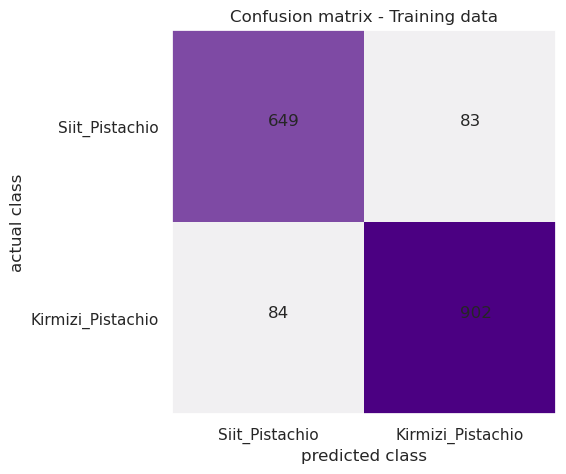

In [19]:
from sklearn.metrics import confusion_matrix
def make_confusion_matrix_plot(
    predicted_classes,
    actual_classes,
    title:str = 'confusion matrix',
    xlabel: str='predicted class',
    ylabel: str='actual class',
    class_names: List[str] = None,
    normalise:str=None
    ):
    """ generate confusion matrix plot"""
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    ax.grid(False)
    # cmap = sns.color_palette("magma_r", as_cmap=True)
    cmap = sns.light_palette("indigo", as_cmap=True)

    # cmap = 'viridis'
    
    matrix = confusion_matrix(actual_classes,predicted_classes, normalize=normalise)
    ax.imshow(matrix, cmap=cmap)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(i,j,f'{matrix[i,j]}')
    # ax.plot([0.0, 1.0],[0.0, 1.0], color=sns.xkcd_rgb['merlot'], linestyle='--', label='random')
    labels = class_names if class_names else ['0','1']

    ax.set_xlim([-0.5, matrix.shape[0]- 0.5])
    ax.set_ylim([matrix.shape[0]- 0.5, -0.5])
    ax.set_xticks(np.arange(matrix.shape[0]))
    ax.set_yticks(np.arange(matrix.shape[0]))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    # ax.legend()
    # fig.show()
    return fig, ax

fig, ax = make_confusion_matrix_plot(
    train_predicted_classes, 
    train_y,
    class_names=train_proc.Class.cat.categories.to_list(),
    title='Confusion matrix - Training data'
    
)
fig.savefig('./figures/train_confusion_matrix.png')

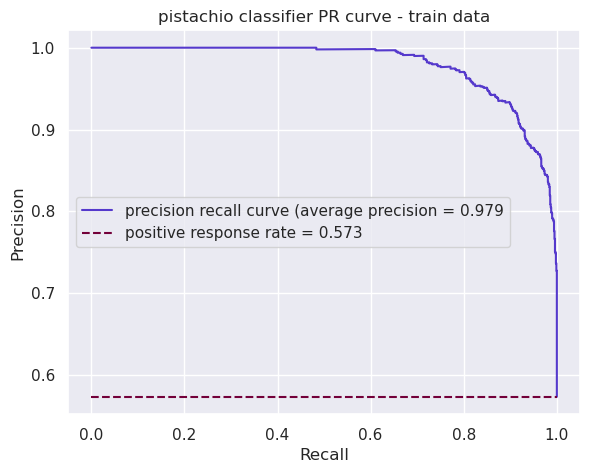

In [20]:
from sklearn.metrics import precision_recall_curve, average_precision_score
sns.set()

def make_precision_recall_plot(predicted_probs, actual_classes, title: str="ROC curve", xlabel='False Positive Rate',ylabel: str='True Positive Rate',
                              positive_rate:float=None):
    """make a roc curve"""
    precision, recall, _ = precision_recall_curve(actual_classes, predicted_probs)
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    classifier_average_precision = average_precision_score(actual_classes, predicted_probs)
    ax.plot(recall, precision, color=sns.xkcd_rgb['blurple'], label=f'precision recall curve (average precision = {classifier_average_precision:0.3f}')
    if positive_rate:
        ax.plot([0.0, 1.0],[positive_rate, positive_rate], color=sns.xkcd_rgb['merlot'], linestyle='--', label=f'positive response rate = {positive_rate:0.3f}')
    
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(title)
    ax.legend()
    # fig.show()
    return fig, ax

    
fig, ax = make_precision_recall_plot(train_predicted_probs, train_y, title='pistachio classifier PR curve - train data', positive_rate=train_positive_response_rate)
fig.savefig('./figures/train_PR_plot.png')


     pred_prob  class_prob  bin_size
bin                                 
0     0.009939    0.000000        35
1     0.012823    0.000000        34
2     0.015553    0.000000        35
3     0.021179    0.000000        34
4     0.030138    0.000000        34
5     0.040473    0.000000        35
6     0.047546    0.000000        34
7     0.054772    0.000000        34
8     0.061938    0.000000        35
9     0.072240    0.000000        34
10    0.084077    0.029412        34
11    0.096565    0.085714        35
12    0.111014    0.029412        34
13    0.136005    0.088235        34
14    0.173658    0.142857        35
15    0.207210    0.088235        34
16    0.245924    0.294118        34
17    0.296195    0.228571        35
18    0.336655    0.470588        34
19    0.390112    0.500000        34
20    0.453781    0.400000        35
21    0.518130    0.382353        34
22    0.602791    0.676471        34
23    0.660918    0.714286        35
24    0.710834    0.705882        34
2

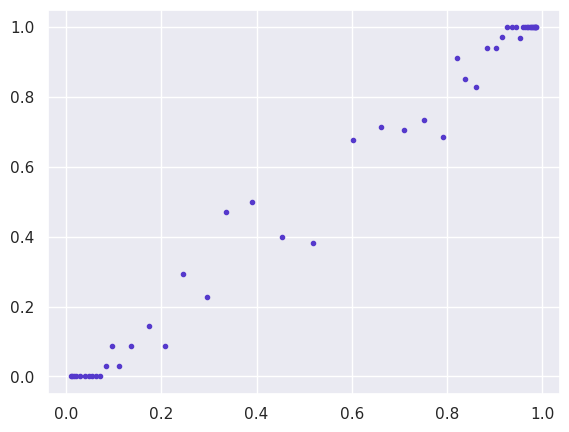

In [47]:
# probability calibration

def make_prob_calibration_plot(predicted_probs, actual_classes, n_bins: int=20):
    """bin records, check that proportion of labels in each bin matches mean probability of that bin"""
    bins = pd.qcut(predicted_probs, n_bins, labels=False)
    df = pd.DataFrame({'probability':predicted_probs, 'class':actual_classes, 'bin':bins})
    df = df.sort_values(by='probability',ascending=False).reset_index(drop=True)
    agged = df.groupby('bin').agg(
        pred_prob=pd.NamedAgg('probability','mean'),
        class_prob=pd.NamedAgg('class','mean'),
        bin_size=pd.NamedAgg('class','count')
    )
    # print(agged)
    fig = plt.figure()
    ax = fig.add_axes([0.1,0.1, 0.8, 0.8])
    ax.plot(agged.pred_prob, agged.class_prob, '.', color=sns.xkcd_rgb['blurple'])
    
make_prob_calibration_plot(train_predicted_probs, train_y, n_bins=50)
    
    

In [21]:
# for x in train.columns:
#     schema = schema.update_column(x, nullable=False)
sc2 = pa.DataFrameSchema({
    'col1': pa.Column(str, nullable=True),
    'col2': pa.Column(int, nullable=False, unique=True)})
print(sc2)


<Schema DataFrameSchema(
    columns={
        'col1': <Schema Column(name=col1, type=DataType(str))>
        'col2': <Schema Column(name=col2, type=DataType(int64))>
    },
    checks=[],
    coerce=False,
    dtype=None,
    index=None,
    strict=False,
    name=None,
    ordered=False,
    unique_column_names=False,
    metadata=None, 
    add_missing_columns=False
)>


In [22]:
print(schema)

NameError: name 'schema' is not defined

In [ ]:
#print(schema.to_script())

In [ ]:
# import pandera
# pandera.__version__
import xgboost
xgboost.__version__